# Group 8: Project Milestone 1

## Predicting Online Shopper Intention

**Contributors**

* Calvin Choi
* Nour Abdelfattah
* Saicharanraj Pusuluri
* Sana Shams

# Introduction

Given the surge of online shopping, online retailers may get a lot of site traffic but what ultimately matters is whether or not users finalize their purchase. Marketing and User Experience teams are tasked with optimizing a site’s interface and content in order to improve customer retention and the site’s revenue. Given this, understanding customer browsing behaviour and web page features is crucial for not only improving the user’s experience, but also maximizing the retailer’s revenue.

This project aims to analyze various features of online shopper’s sessions on a site to predict whether the customer makes a purchase. We will use the dataset, [Online Shoppers Purchasing Intention](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset) dataset from the UCI Machine Learning Repository. 

**Question**

Using all variables provided in the dataset, which group of explanatory variables form the best prediction for the user's purchase intent?


### Imports

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading in data

data = pd.read_csv("../data/online_shoppers_intention.csv")

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Exploratory Data Analysis

In [3]:
# obtaining summary of dataset

data_summary = data.describe(include = 'all')
data_summary.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.00000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.74622,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN


#### Summary of features

* **Administrative**: the number of pages visited by user of this administrative type
* **Administrative_Duration**: the amount of time spent on pages of this administrative type
* **Informational**: the number of pages visited by user of this informational type
* **Informational_Duration**: the amount of time spent on this informational category of pages
* **ProductRelated**: the number of pages of this type of product the user visited
* **ProductRelated_Duration**: the amount of time spent on pages featuring related products
* **BounceRates**: percentage of visitors who enter the web page then leave ("bounce") without triggering any other requests to the analytics server during the session
* **ExitRates**: the percentage of pageviews where the given page is the last page before exiting website
* **PageValues**: the average value for a web page that a user visited before completing an e-commerce transaction
* **SpecialDay**: the temporal proximity between the day the user is visiting the page and a special day (eg. Valentines Day, Christmas, Mother's Day, etc.). 
* **Month**: the month the page was viewed
* **OperatingSystems**: an integer value representing the operating system of the user when viewing the page
* **Browser**: an integer value representing the user's browser when viewing the page
* **Region**: an integer value representing the user's traffic type. [Learn more about user traffic types here](https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics)
* **VisitorType**: categorizes the user into 'New Visitor', 'Returning Visitor', and 'Other'.
* **Weekend**: a boolean value, indicating whether the user's session took place during a weekend or not
* **Revenue**: a boolean value, indicating whether the user made the purchase or not
    * **This will be our target feature**

In [4]:
data["Browser"].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

In [5]:
# obtaining the data type of all features

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# checking for null values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Data Cleaning

After examining the different features and ensuring there are no missing values, let us  further refine the data for explanatory and target features of interest.

In [20]:
data.duplicated().value_counts()

False    12205
True       125
Name: count, dtype: int64

**Note**: 
- 'False': number of unique rows, no duplicates
- 'True': number of rows with duplicates

Let us examine the 125 duplicated rows

In [22]:
duplicates = data[data.duplicated()]
data.drop_duplicates(inplace=True)

We will drop the duplicated instances from our dataframe as keeping them can worsen class imbalance and bias in the data, skewing our model and affecting its generalizability on deployment data. 

We will also drop the feature, 'OperatingSystems'. Given that the goal of this analysis is to provide better inisght for understanding what features affect the user's shopping behaviour, operating system is not relevant as long as the user is able to access a browser. 

In [8]:
data.drop(columns = ["OperatingSystems"])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,3,11,Returning_Visitor,False,False


### Exploratory Visualization

To inform the chosen method of visualization, let us first document if the features are continuous values, or if they are discrete categorical values. Some features are categorical but represented as integers so this step will allow for clarification.

| Feature | Type |
| --------| -----|
| Administrative | numerical, continuous |
| Administrative_Duration | numerical, continuous |
| Informational | numerical, continuous |
| Informational_Duration | numerical, continuous |
| ProductRelated | numerical, continuous |
| ProductRelated_Duration | numerical, continuous |
| BounceRates | numerical, continuous |
| ExitRates | numerical, continuous |
| PageValues | numerical, continuous |
| SpecialDay | numerical, continuous |
| Month | categorical, discrete |
| OperatingSystems | categorical, discrete |
| Browser | categorical, discrete |
| Region | categorical, discrete |
| VisitorType | categorical, discrete |
| Weekend | categorical, discrete, boolean |
| Revenue | categorical, discrete, boolean |

### Visualizing Numerical Features Against Revenue

In [9]:
# defining list of numerical features
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational',
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', "PageValues", 'SpecialDay']

Given that Revenue is our target feature, let us examine its distribution.

In [27]:
data[data['Revenue'] == True]



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
101,4,61.000000,0,0.00,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,True
188,9,111.500000,1,48.50,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,True
196,2,56.000000,1,144.00,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,Nov,2,2,1,3,Returning_Visitor,True,True
12276,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,Dec,2,10,1,2,New_Visitor,False,True
12311,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True


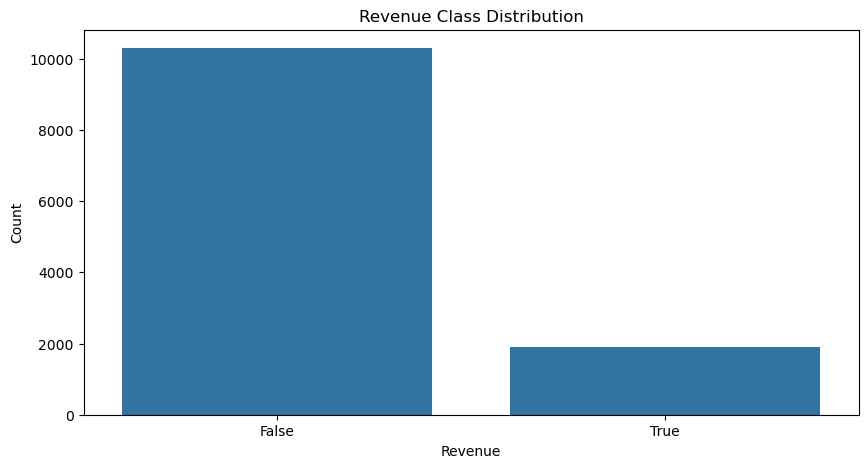

In [43]:
# plotting distribution of Revenue

# success = data[data['Revenue']==True]

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Revenue')
plt.title('Revenue Class Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()


## Methods

## Results

| Feature | Type |
| --------| -----|
| Administrative | numerical, continuous |
| Administrative_Duration | numerical, continuous |
| Informational | numerical, continuous |
| Informational_Duration | numerical, continuous |
| ProductRelated | numerical, continuous |
| ProductRelated_Duration | numerical, continuous |
| BounceRates | numerical, continuous |
| ExitRates | numerical, continuous |
| PageValues | numerical, continuous |
| SpecialDay | numerical, continuous |
| Month | categorical, discrete |
| OperatingSystems |  |
| Browser |  |
| Region |  |
| VisitorType |  |
| Weekend |  |
| Revenue |  |

| Feature | Type |
| --------| -----|
| Administrative | numerical, continuous |
| Administrative_Duration | numerical, continuous |
| Informational | numerical, continuous |
| Informational_Duration | numerical, continuous |
| ProductRelated | numerical, continuous |
| ProductRelated_Duration | numerical, continuous |
| BounceRates | numerical, continuous |
| ExitRates | numerical, continuous |
| PageValues | numerical, continuous |
| SpecialDay | numerical, continuous |
| Month | categorical, discrete |
| OperatingSystems |  |
| Browser |  |
| Region |  |
| VisitorType |  |
| Weekend |  |
| Revenue |  |
